In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load Dataset

In [3]:
data = pd.read_csv('referral.csv', parse_dates=['date'])
data.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 6 columns):
user_id        97341 non-null int64
date           97341 non-null datetime64[ns]
country        97341 non-null object
money_spent    97341 non-null int64
is_referral    97341 non-null int64
device_id      97341 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.5+ MB


In [5]:
print('Unique country:\t', len(data['country'].unique()))
print('Unique user id:\t', len(data['user_id'].unique()))
print('Unique device:\t', len(data['device_id'].unique()))

Unique country:	 9
Unique user id:	 18809
Unique device:	 17887


# Data Processing

In [6]:
# extract date information
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)
start_date = pd.to_datetime('2015-10-31')

In [7]:
data.head()

,user_id,date,country,money_spent,is_referral,device_id,dayofweek
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,5
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,5
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,5
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,5
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,5


# Data Visualization

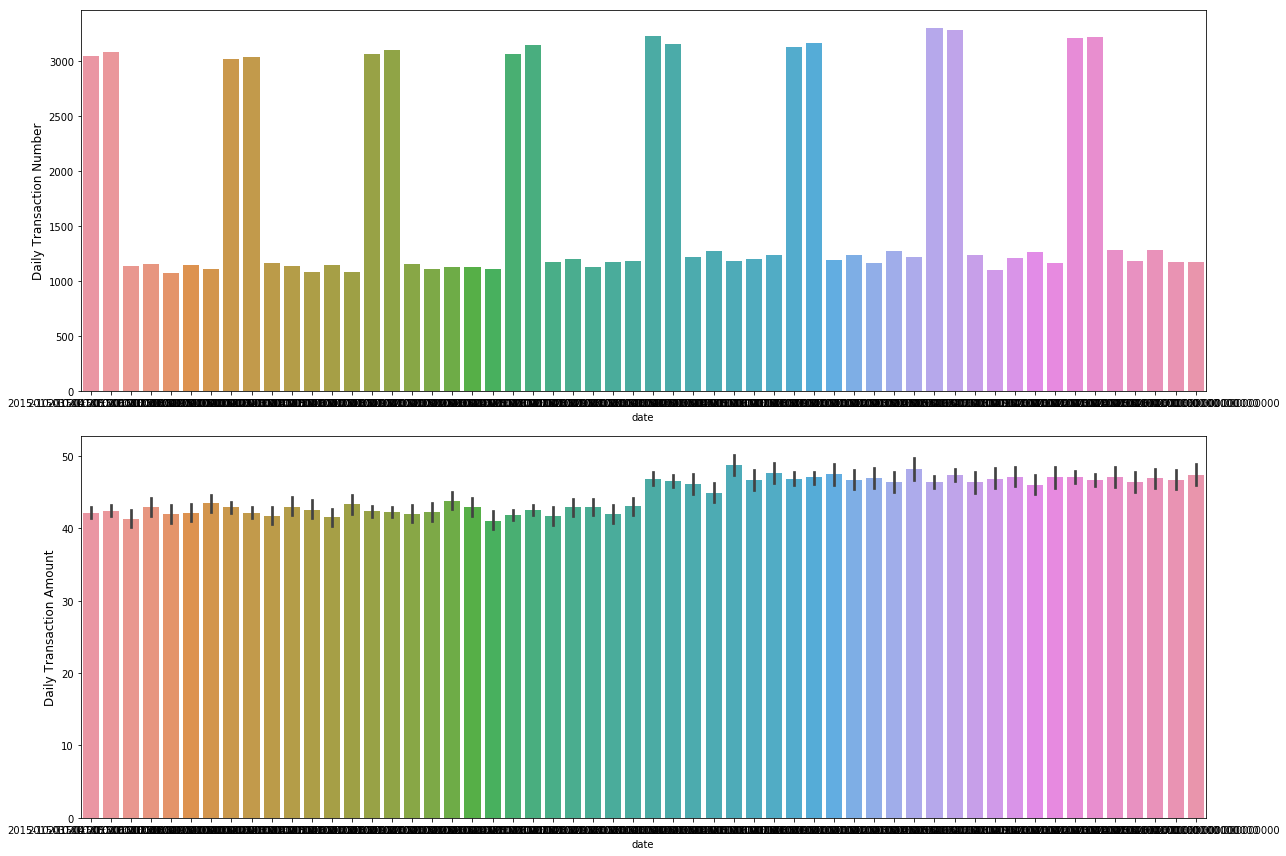

In [8]:
# daily money spent visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='date', data=data, ax=ax[0])
ax[0].set_ylabel('Daily Transaction Number', fontsize=12)

sns.barplot(x='date', y='money_spent', data=data, ax=ax[1])
ax[1].set_ylabel('Daily Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

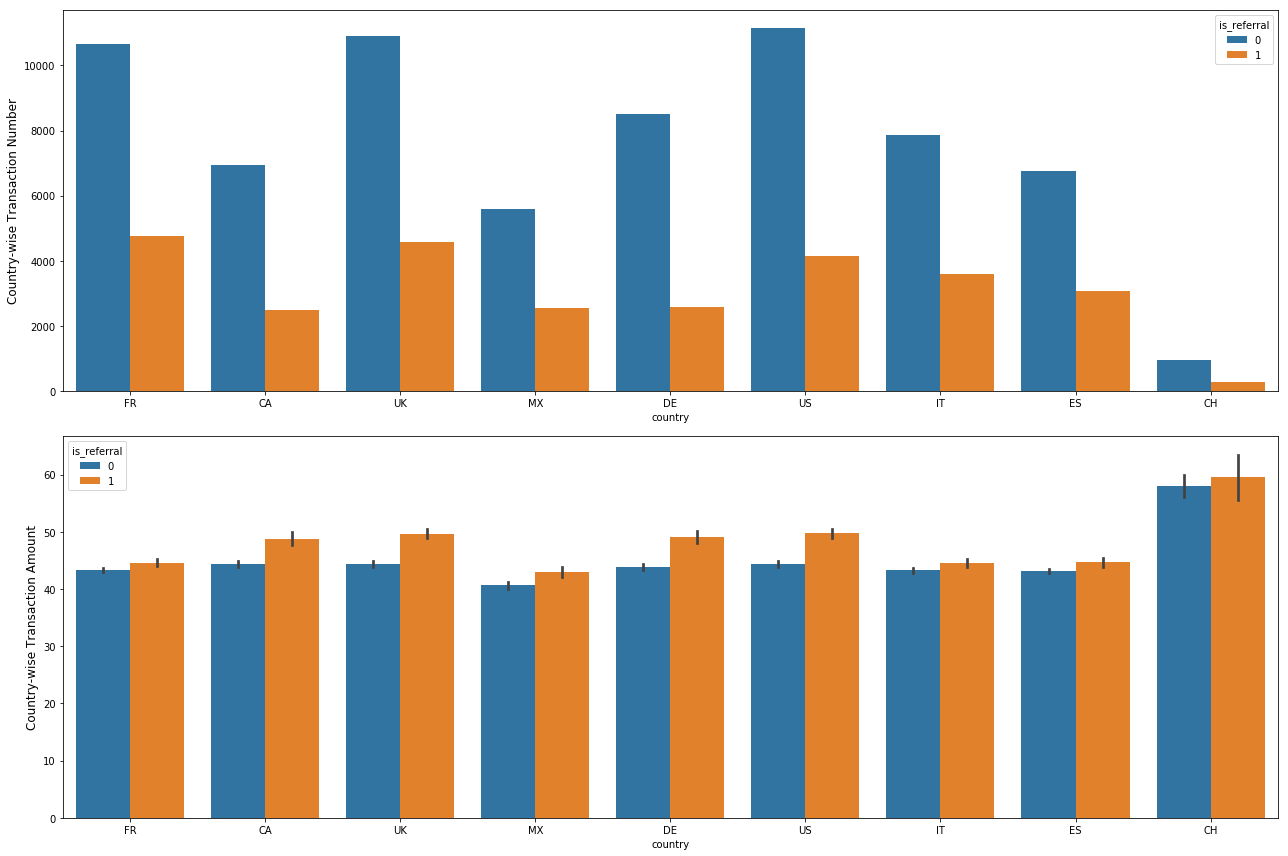

In [9]:
# daily money spent visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='country', hue='is_referral', data=data, ax=ax[0])
ax[0].set_ylabel('Country-wise Transaction Number', fontsize=12)

sns.barplot(x='country', y='money_spent', hue='is_referral', data=data, ax=ax[1])
ax[1].set_ylabel('Country-wise Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

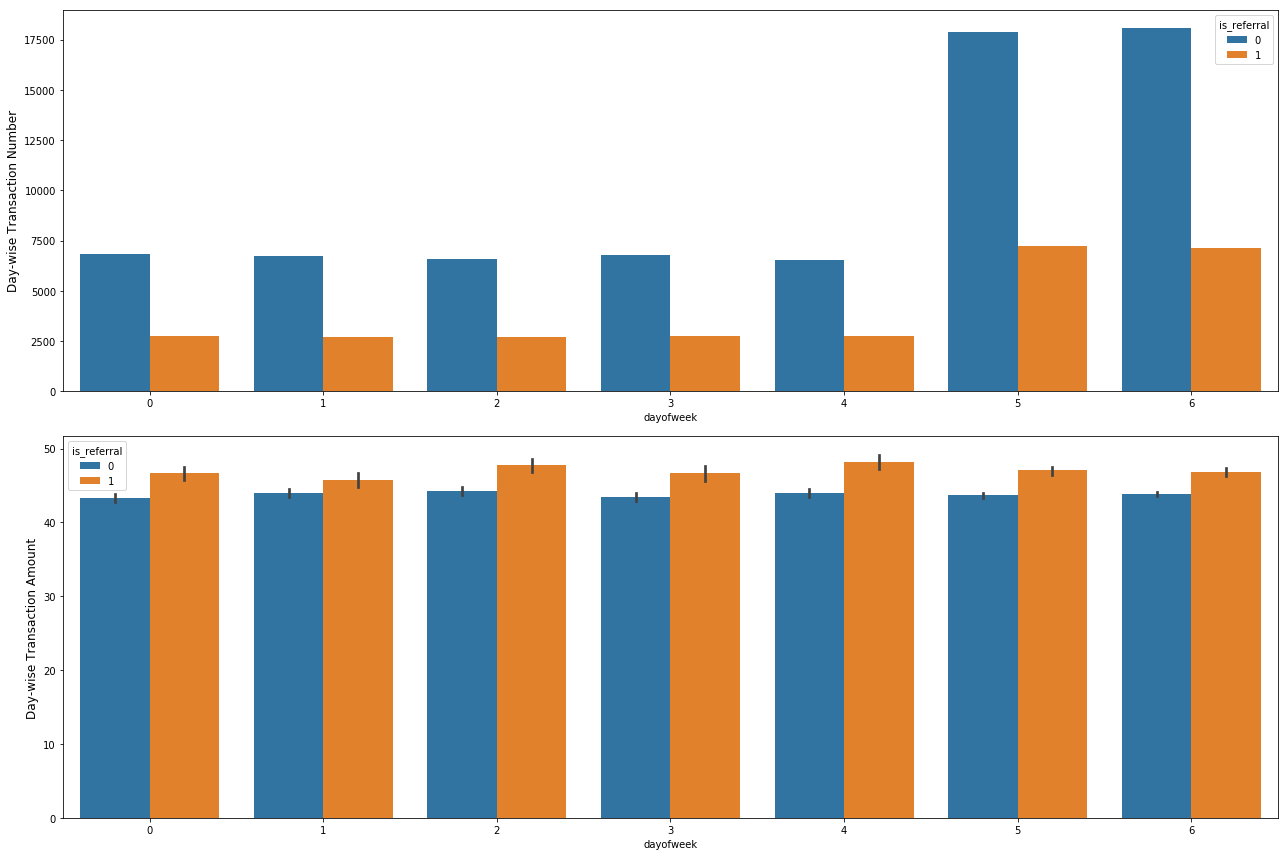

In [10]:
# daily money spent visualization (Monday is 0 and Sunday is 6)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='dayofweek', hue='is_referral', data=data, ax=ax[0])
ax[0].set_ylabel('Day-wise Transaction Number', fontsize=12)

sns.barplot(x='dayofweek', y='money_spent', hue='is_referral', data=data, ax=ax[1])
ax[1].set_ylabel('Day-wise Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

# Data Analysis

In [11]:
data.head()

,user_id,date,country,money_spent,is_referral,device_id,dayofweek
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,5
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,5
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,5
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,5
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,5


### 1. Daily Analysis

In [12]:
def basic_stat(df):
    """ function to calculate statistics """
    no_purchase = len(df)
    money_spent = df['money_spent'].sum()
    unique_user = len(df['user_id'].unique())
    
    return pd.Series([no_purchase, money_spent, unique_user], 
                     index=['no_purchase', 'money_spent', 'unique_user'])

In [13]:
def daily_stat(data):
    grouped = data.groupby('date').apply(basic_stat).reset_index()
    ref = grouped[grouped['date'] < start_date]
    new = grouped[grouped['date'] >= start_date]
    
    names = ['no_purchase', 'money_spent', 'unique_user']
    vals = []
    for name in names:
        a = ref[name].values
        b = new[name].values
        # p-value should be one-side test
        p_val = ttest_ind(a, b, equal_var=False)[1] / 2
        vals.append(p_val)
        
    return pd.Series(vals, index=names)

In [14]:
daily_stat(data)

no_purchase    0.348257
money_spent    0.135194
unique_user    0.059545
dtype: float64

## 2. Country-wise Analysis

In [15]:
data.groupby('country').apply(daily_stat).reset_index()

,country,no_purchase,money_spent,unique_user
0,CA,0.233985,0.351704,0.268256
1,CH,0.003072,0.006941,0.003142
2,DE,0.011798,0.081459,0.015665
3,ES,0.072638,0.037522,0.057954
4,FR,0.058996,0.031843,0.041124
5,IT,0.057454,0.025730,0.043911
6,MX,0.032430,0.009670,0.026203
7,UK,0.261183,0.048490,0.204398
8,US,0.307801,0.248874,0.368860


### 3. Day-of-week-wise Analysis

In [16]:
data.groupby('dayofweek').apply(daily_stat).reset_index()

,dayofweek,no_purchase,money_spent,unique_user
0,0,0.012484,0.000368,0.000665
1,1,0.156965,0.007701,0.008802
2,2,0.009713,0.000301,0.001270
3,3,0.016584,0.000675,0.002578
4,4,0.016875,0.000595,0.000683
5,5,0.006828,0.000107,0.000125
6,6,0.011717,0.000133,0.000012


# Questions

### Question 1

According to the analysis above, the program doesn't seem have significant impacts to the whole company as a whole.

However, based on each country, I find the program has different impact on different country:

- the program fails in CH and DE, it significantly decrease the sales in these two countries.
- the program succeeds in 'MX','IT','FR','ES', it significantly increase the sales.
- the program doesn't seem have any significant effect on UK,CA,US, especially on CA and US.

### Question 2

* first I suggest perform more accurate A/B test (see question 3's answer) and collect more data, to study the impact of the program
* since the program has different impact in different country, I suggest studying the reason of such difference. for example, does the program has any cultural conflicts in CH and DE?

### Question 3

This approach isn't an accurate A/B test. "User Referral" program isn't the only difference between control group and test group. for example, there may be some special holiday after Oct 31 in some country. or just because the weather get colder after Oct 31, people's requirement on some goods are increased.

To get more accurate impact of the program, we need to perform a more careful A/B test. for example:
* during the same peroid of time
* randomly split the customers into two groups, and let only one group know the User Referral program.
* run the experiment some time, then perform the t-test to see whether some 'sale performance index' (e.g., daily spent, daily customers, daily transactions) have significant changes or not.